In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(18,8)})
import warnings
warnings.filterwarnings('ignore')

## Data Collecting

In [2]:
df = pd.read_csv(r"E:\Data Science\Datasets\Taxi_data.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,pickup_day_number,dropoff_day_number,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,Profit
0,98539,23988,2,2016-01-11 12:05:45,2016-01-11 12:12:34,1,-73.989449,40.741734,-73.996880,40.725307,...,0,0,12,12,1,1,Afternoon,Afternoon,1.930838,8.324456
1,77708,8826,1,2016-01-14 12:04:38,2016-01-14 12:21:14,1,-73.993034,40.747849,-73.979271,40.749985,...,3,3,12,12,1,1,Afternoon,Afternoon,1.183499,5.036161
2,5192,223699,1,2016-01-09 20:03:09,2016-01-09 20:10:45,1,-74.005157,40.720306,-73.994019,40.736187,...,5,5,20,20,1,1,Evening,Evening,1.999803,8.627900
3,98047,65948,1,2016-01-17 00:29:19,2016-01-17 00:31:09,2,-73.985374,40.753082,-73.979370,40.760429,...,6,6,0,0,1,1,Late night,Late night,0.960832,4.056429
4,50057,156273,2,2016-01-24 23:53:10,2016-01-25 00:13:46,1,-74.014000,40.712551,-73.972519,40.797508,...,6,0,23,0,1,1,Late night,Late night,10.072253,44.146681


In [3]:
pd.set_option('display.max_columns',None)
df.head()

,Unnamed: 0.1,Unnamed: 0,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day_name,dropoff_day_name,pickup_day_number,dropoff_day_number,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,Profit
0,98539,23988,2,2016-01-11 12:05:45,2016-01-11 12:12:34,1,-73.989449,40.741734,-73.996880,40.725307,N,409,Monday,Monday,0,0,12,12,1,1,Afternoon,Afternoon,1.930838,8.324456
1,77708,8826,1,2016-01-14 12:04:38,2016-01-14 12:21:14,1,-73.993034,40.747849,-73.979271,40.749985,N,996,Thursday,Thursday,3,3,12,12,1,1,Afternoon,Afternoon,1.183499,5.036161
2,5192,223699,1,2016-01-09 20:03:09,2016-01-09 20:10:45,1,-74.005157,40.720306,-73.994019,40.736187,N,456,Saturday,Saturday,5,5,20,20,1,1,Evening,Evening,1.999803,8.627900
3,98047,65948,1,2016-01-17 00:29:19,2016-01-17 00:31:09,2,-73.985374,40.753082,-73.979370,40.760429,N,110,Sunday,Sunday,6,6,0,0,1,1,Late night,Late night,0.960832,4.056429
4,50057,156273,2,2016-01-24 23:53:10,2016-01-25 00:13:46,1,-74.014000,40.712551,-73.972519,40.797508,N,1236,Sunday,Monday,6,0,23,0,1,1,Late night,Late night,10.072253,44.146681


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56278 entries, 0 to 56277
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        56278 non-null  int64  
 1   Unnamed: 0          56278 non-null  int64  
 2   vendor_id           56278 non-null  int64  
 3   pickup_datetime     56278 non-null  object 
 4   dropoff_datetime    56278 non-null  object 
 5   passenger_count     56278 non-null  int64  
 6   pickup_longitude    56278 non-null  float64
 7   pickup_latitude     56278 non-null  float64
 8   dropoff_longitude   56278 non-null  float64
 9   dropoff_latitude    56278 non-null  float64
 10  store_and_fwd_flag  56278 non-null  object 
 11  trip_duration       56278 non-null  int64  
 12  pickup_day_name     56278 non-null  object 
 13  dropoff_day_name    56278 non-null  object 
 14  pickup_day_number   56278 non-null  int64  
 15  dropoff_day_number  56278 non-null  int64  
 16  pick

In [5]:
df_temp = df.copy()

## Data Cleaning

In [6]:
# Get rid from unnecessary columns
df.drop(columns=['Unnamed: 0.1','Unnamed: 0','store_and_fwd_flag','trip_duration',
                 'pickup_day_number','dropoff_day_number','dropoff_hour',
                'dropoff_month','dropoff_timeofday','dropoff_day_name'],inplace=True)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day_name,pickup_hour,pickup_month,pickup_timeofday,distance,Profit
0,2,2016-01-11 12:05:45,2016-01-11 12:12:34,1,-73.989449,40.741734,-73.996880,40.725307,Monday,12,1,Afternoon,1.930838,8.324456
1,1,2016-01-14 12:04:38,2016-01-14 12:21:14,1,-73.993034,40.747849,-73.979271,40.749985,Thursday,12,1,Afternoon,1.183499,5.036161
2,1,2016-01-09 20:03:09,2016-01-09 20:10:45,1,-74.005157,40.720306,-73.994019,40.736187,Saturday,20,1,Evening,1.999803,8.627900
3,1,2016-01-17 00:29:19,2016-01-17 00:31:09,2,-73.985374,40.753082,-73.979370,40.760429,Sunday,0,1,Late night,0.960832,4.056429
4,2,2016-01-24 23:53:10,2016-01-25 00:13:46,1,-74.014000,40.712551,-73.972519,40.797508,Sunday,23,1,Late night,10.072253,44.146681


In [7]:
#Search for duplicates
print(df.duplicated().sum())
print(f'{df.duplicated().sum()} Duplicates Removed From {len(df)}')
df.drop_duplicates(inplace=True)

16049
16049 Duplicates Removed From 56278


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40229 entries, 0 to 56276
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vendor_id          40229 non-null  int64  
 1   pickup_datetime    40229 non-null  object 
 2   dropoff_datetime   40229 non-null  object 
 3   passenger_count    40229 non-null  int64  
 4   pickup_longitude   40229 non-null  float64
 5   pickup_latitude    40229 non-null  float64
 6   dropoff_longitude  40229 non-null  float64
 7   dropoff_latitude   40229 non-null  float64
 8   pickup_day_name    40229 non-null  object 
 9   pickup_hour        40229 non-null  int64  
 10  pickup_month       40229 non-null  int64  
 11  pickup_timeofday   40229 non-null  object 
 12  distance           40229 non-null  float64
 13  Profit             40229 non-null  float64
dtypes: float64(6), int64(4), object(4)
memory usage: 4.6+ MB


In [9]:
#Modify dates type
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [10]:
df[['pickup_datetime','dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 40229 entries, 0 to 56276
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pickup_datetime   40229 non-null  datetime64[ns]
 1   dropoff_datetime  40229 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 942.9 KB


In [11]:
df.pickup_month.value_counts()

pickup_month
1    40229
Name: count, dtype: int64

In [12]:
#We found that this data for Jan month only not for the entire year so it's unnecessary
df.drop(columns='pickup_month',inplace=True)

## EDA

In [13]:
#Summary statistics
df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,distance,Profit
count,40229.000000,40229,40229,40229.000000,40229.000000,40229.000000,40229.000000,40229.000000,40229.000000,40229.000000,40229.000000
mean,1.537548,2016-01-16 14:25:58.560441600,2016-01-16 14:40:29.727286272,1.672450,-73.974371,40.751767,-73.974172,40.752033,13.546024,3.207651,13.942433
min,1.000000,2016-01-01 00:00:53,2016-01-01 00:05:54,1.000000,-74.183952,40.398251,-74.185890,40.433281,0.000000,0.134845,0.422086
25%,1.000000,2016-01-09 00:55:29,2016-01-09 01:08:23,1.000000,-73.991692,40.738213,-73.991127,40.736462,9.000000,1.220525,5.199076
50%,2.000000,2016-01-16 04:47:29,2016-01-16 04:57:44,1.000000,-73.981644,40.754627,-73.979774,40.754818,14.000000,2.037531,8.793904
75%,2.000000,2016-01-24 10:29:12,2016-01-24 10:44:45,2.000000,-73.967613,40.768665,-73.963631,40.769638,19.000000,3.698437,16.101890
max,2.000000,2016-01-31 23:54:29,2016-02-01 20:21:19,6.000000,-73.639763,40.876060,-73.550621,40.906281,23.000000,20.798763,91.343325
std,0.498594,NaN,NaN,1.333636,0.035279,0.026696,0.032408,0.030797,6.368288,3.408421,14.997053


# Univariate Analysis

<Axes: xlabel='pickup_hour', ylabel='Density'>

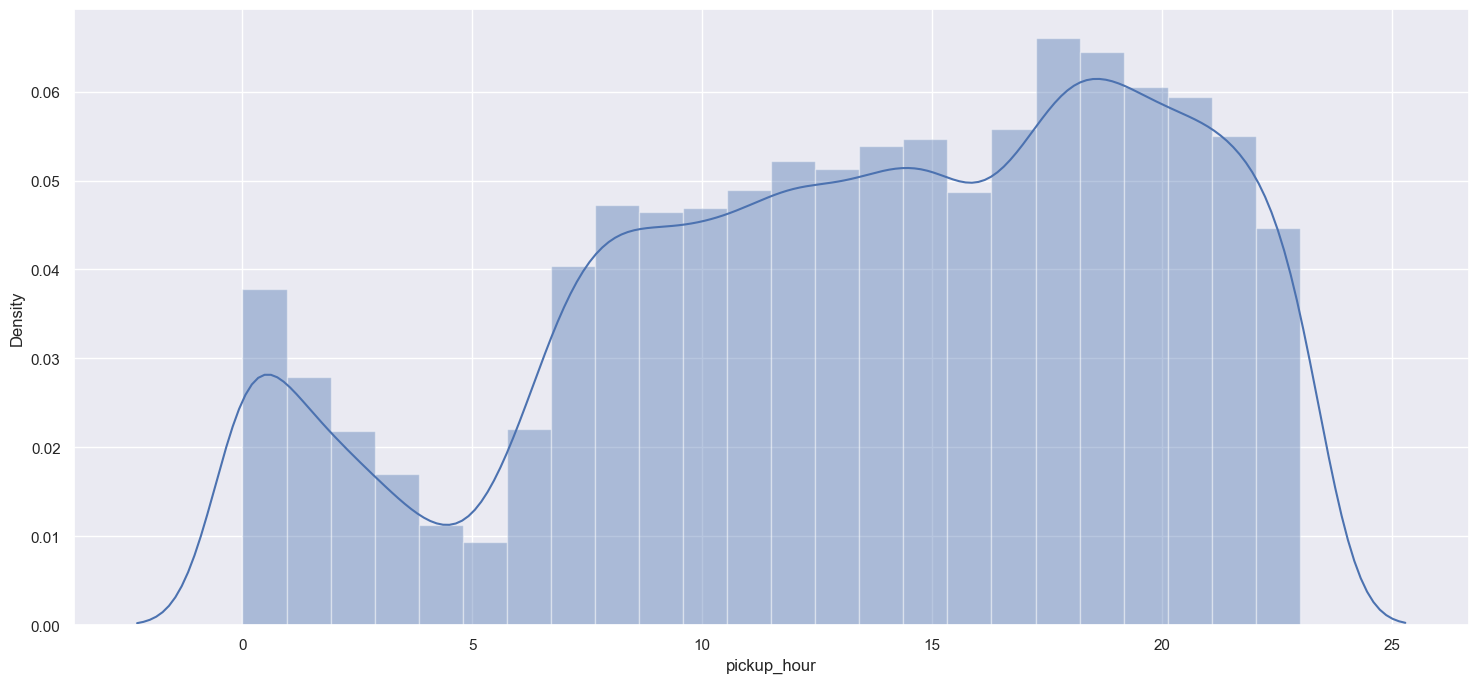

In [14]:
sns.distplot(df['pickup_hour'],bins=24)

<Axes: xlabel='pickup_hour', ylabel='count'>

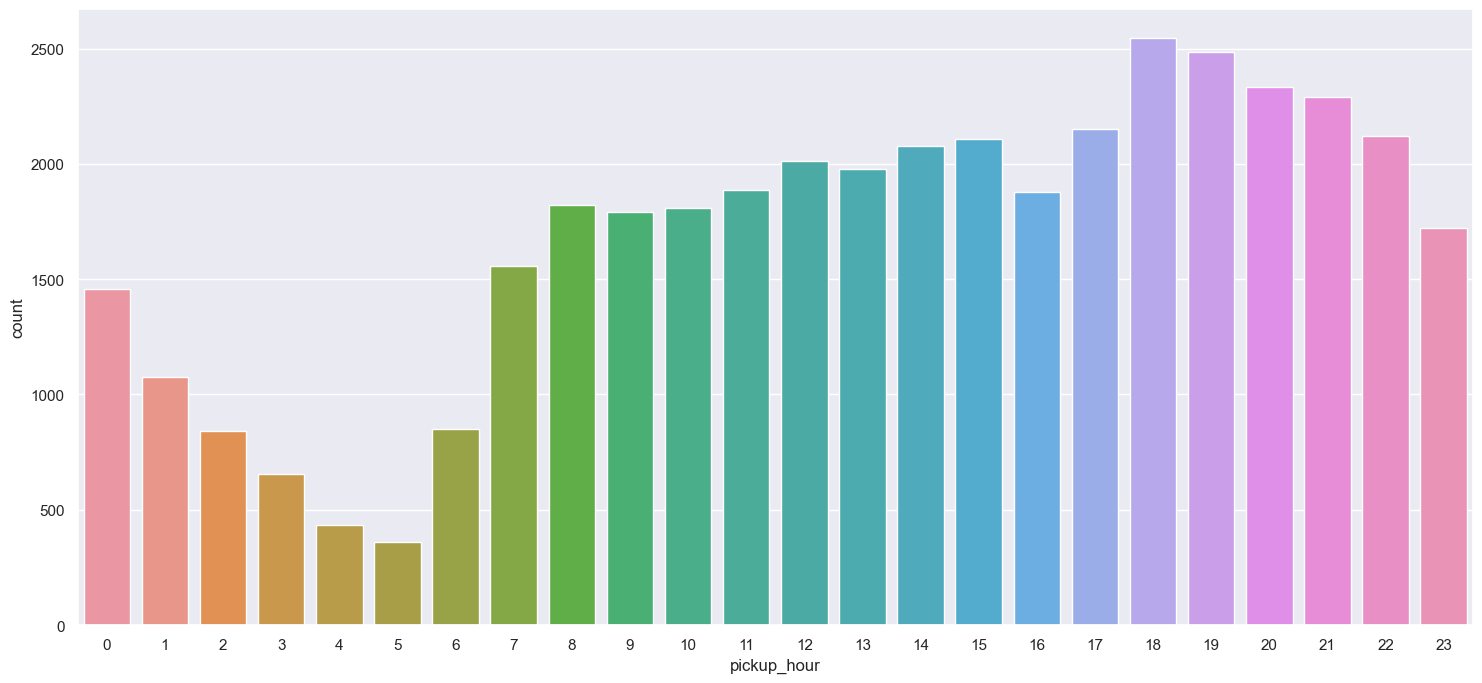

In [15]:
sns.countplot(data=df,x='pickup_hour')

In [16]:
# We found the most pickup hour at (6 PM)

In [17]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day_name,pickup_hour,pickup_timeofday,distance,Profit
0,2,2016-01-11 12:05:45,2016-01-11 12:12:34,1,-73.989449,40.741734,-73.996880,40.725307,Monday,12,Afternoon,1.930838,8.324456
1,1,2016-01-14 12:04:38,2016-01-14 12:21:14,1,-73.993034,40.747849,-73.979271,40.749985,Thursday,12,Afternoon,1.183499,5.036161
2,1,2016-01-09 20:03:09,2016-01-09 20:10:45,1,-74.005157,40.720306,-73.994019,40.736187,Saturday,20,Evening,1.999803,8.627900
3,1,2016-01-17 00:29:19,2016-01-17 00:31:09,2,-73.985374,40.753082,-73.979370,40.760429,Sunday,0,Late night,0.960832,4.056429
4,2,2016-01-24 23:53:10,2016-01-25 00:13:46,1,-74.014000,40.712551,-73.972519,40.797508,Sunday,23,Late night,10.072253,44.146681


<Axes: xlabel='pickup_day_name', ylabel='count'>

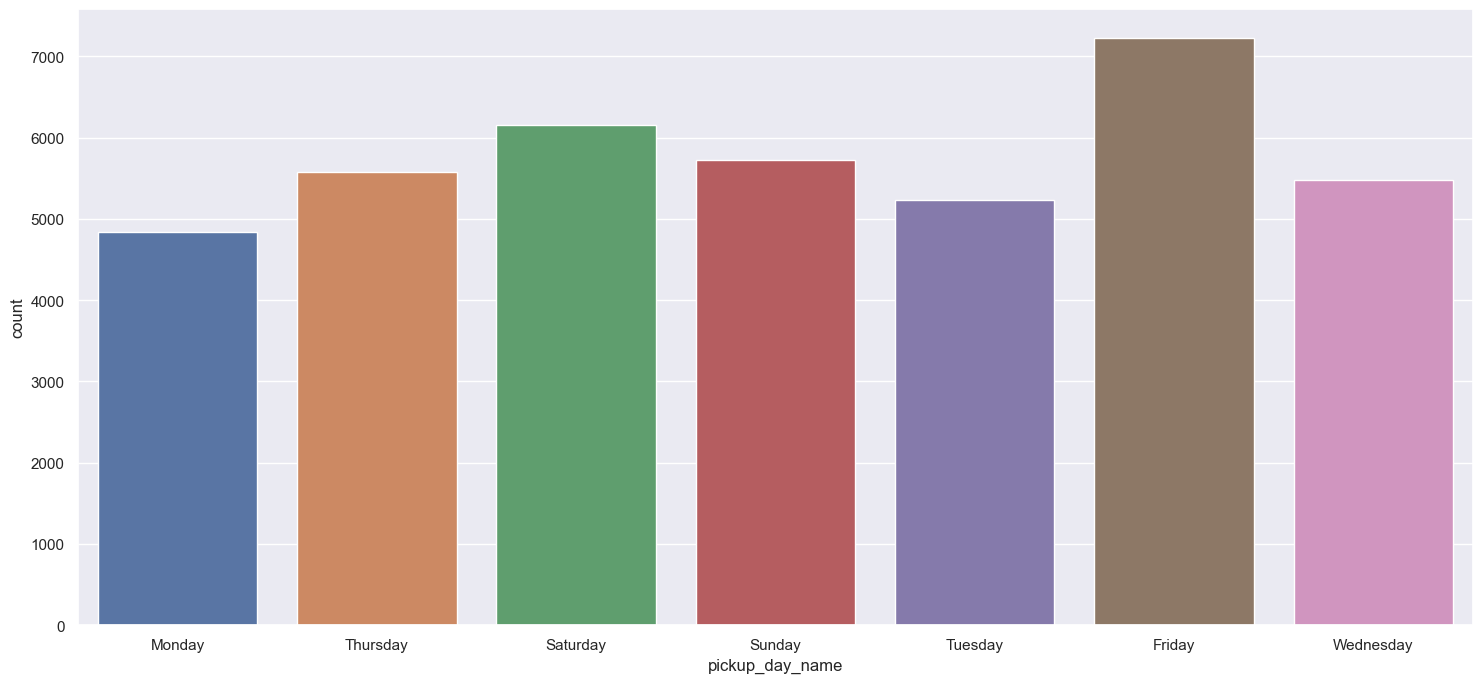

In [18]:
sns.countplot(data=df,x='pickup_day_name')

In [19]:
#We found the most pickup day is in holiday(Friday)

<Axes: xlabel='distance', ylabel='Density'>

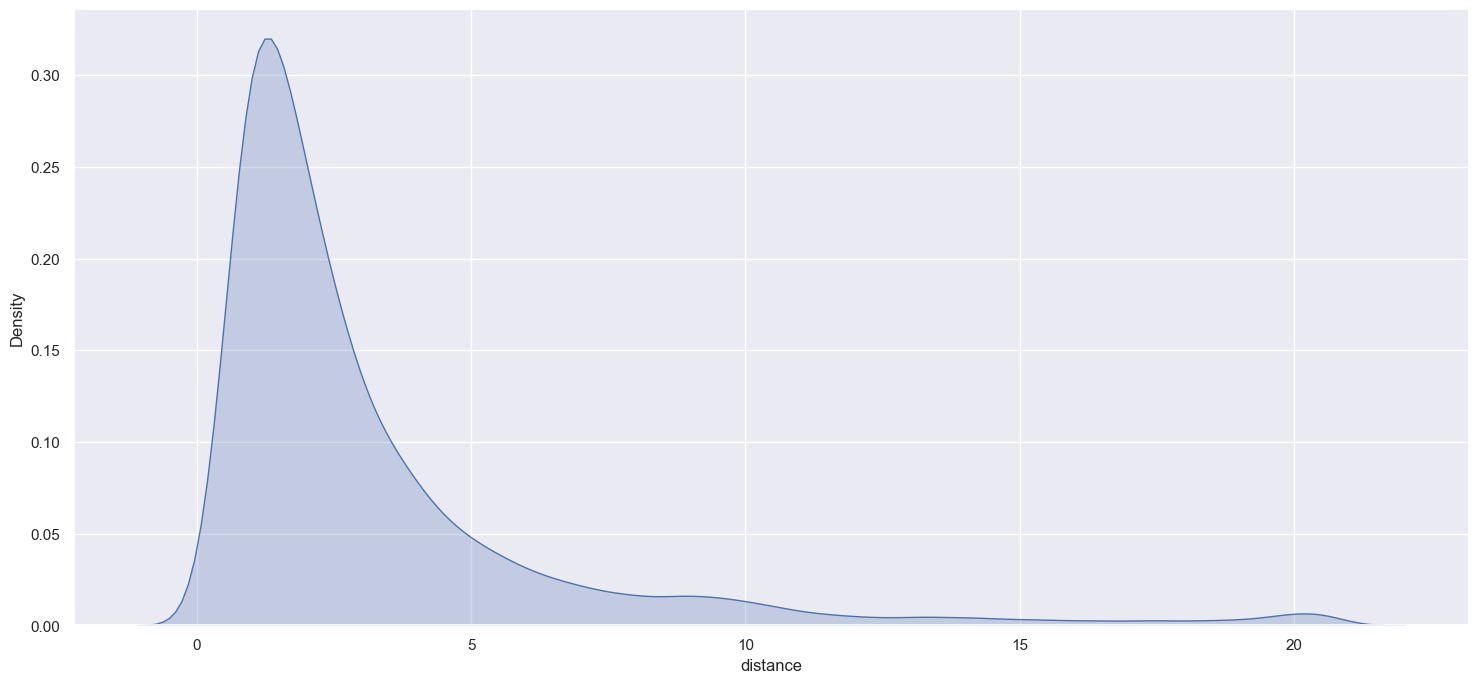

In [20]:
sns.kdeplot(data=df,x='distance',shade=True)
#A right-skewed shape descriped that mean<median that's may detect a large number of outliers

<Axes: xlabel='distance'>

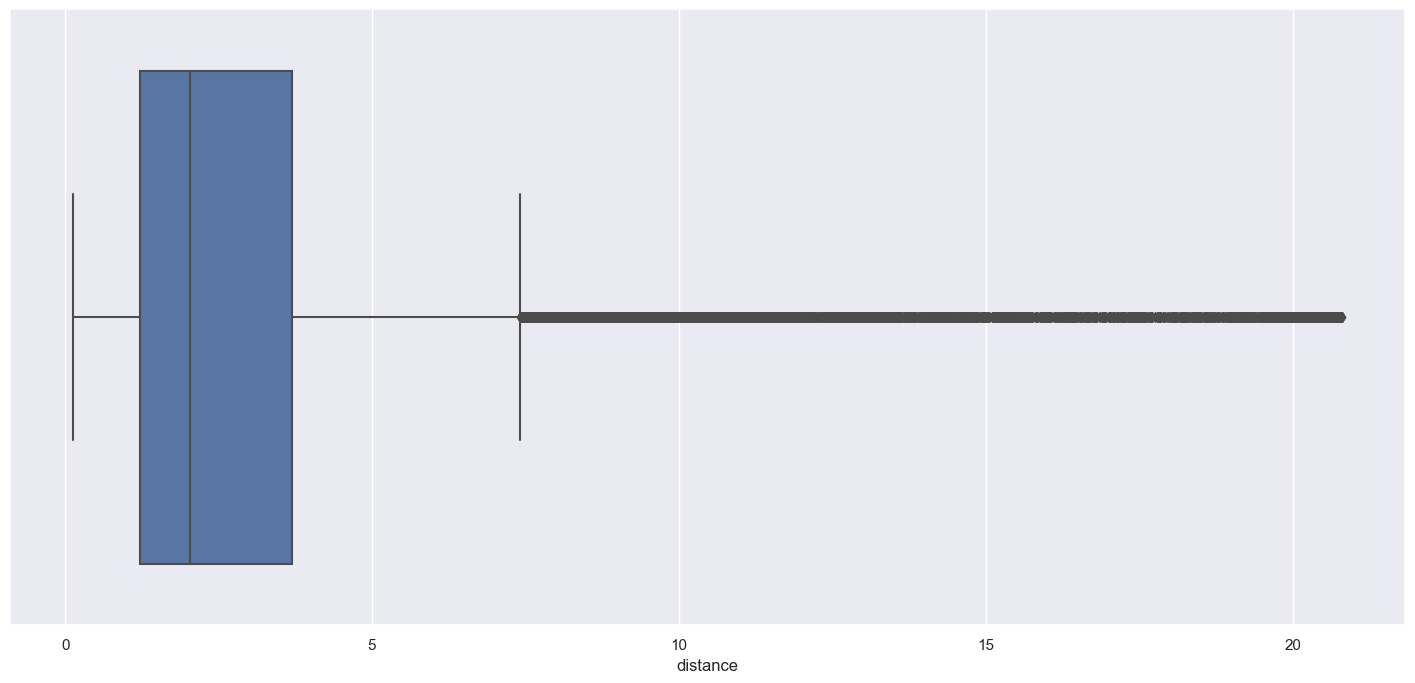

In [21]:
sns.boxplot(data=df,x='distance')
#A huge outliers as excpected!
#That's bec. their is no estimate for the distance that customer while travel to

<Axes: xlabel='Profit', ylabel='Density'>

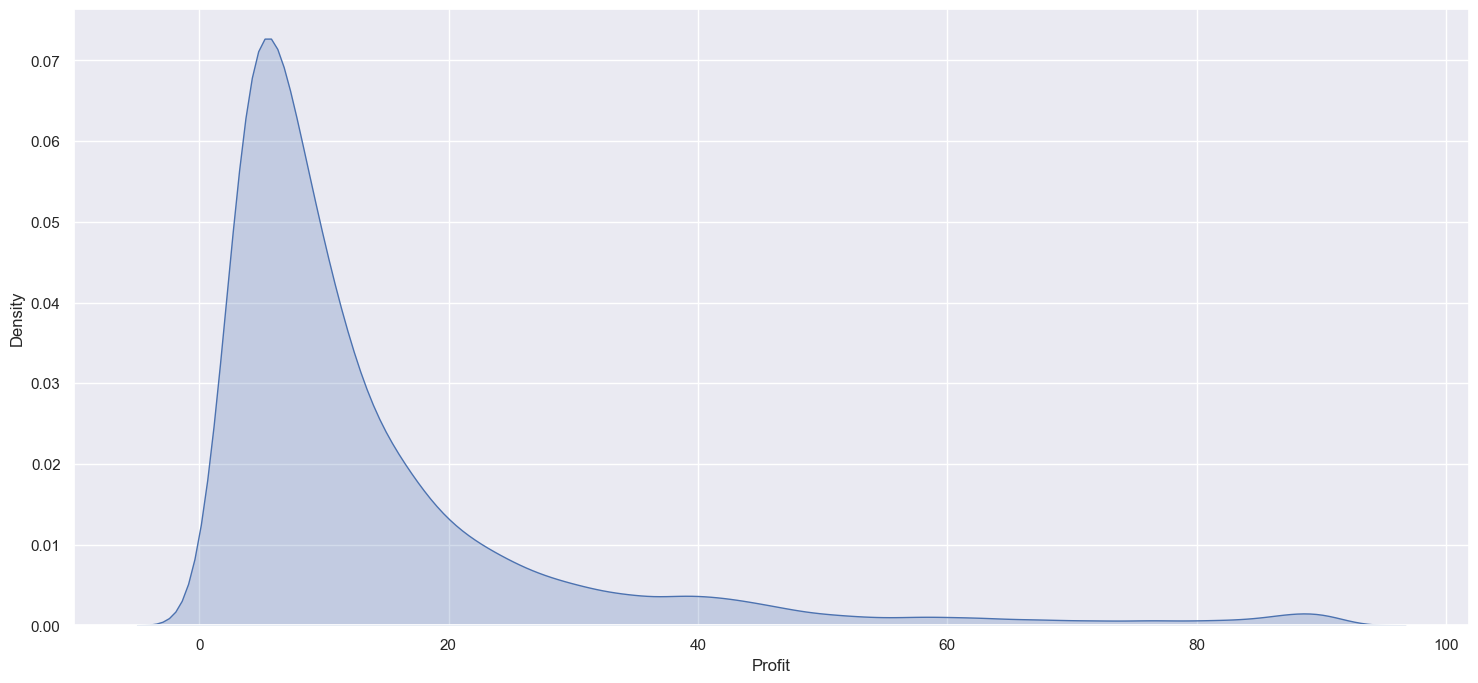

In [22]:
sns.kdeplot(data=df,x='Profit',shade=True)
#The same as distance, That's illustrate an important thing..
#Before we make bivariate analysis, we predict that their is a huge correlation 
#between distance and profit! 

## Bivariate Analysis

In [23]:
df[['distance','Profit']].corr()
# As expected! A strong positive correlation between distance and profit

,distance,Profit
distance,1.0,1.0
Profit,1.0,1.0


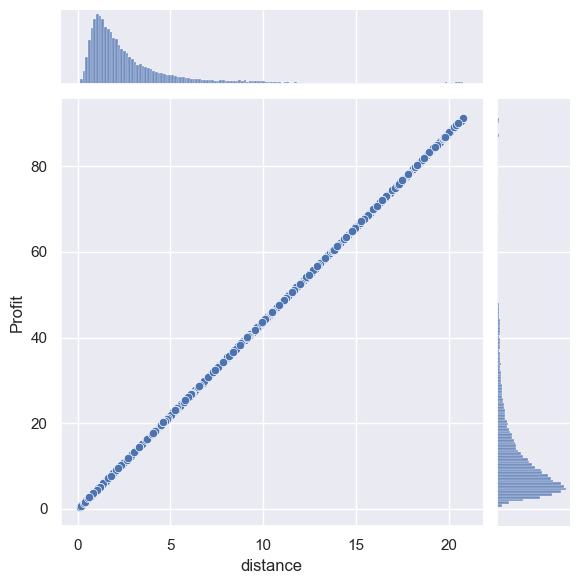

In [24]:
#Liner relation between them!
sns.jointplot(data=df,x='distance',y='Profit')

In [25]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day_name,pickup_hour,pickup_timeofday,distance,Profit
0,2,2016-01-11 12:05:45,2016-01-11 12:12:34,1,-73.989449,40.741734,-73.996880,40.725307,Monday,12,Afternoon,1.930838,8.324456
1,1,2016-01-14 12:04:38,2016-01-14 12:21:14,1,-73.993034,40.747849,-73.979271,40.749985,Thursday,12,Afternoon,1.183499,5.036161
2,1,2016-01-09 20:03:09,2016-01-09 20:10:45,1,-74.005157,40.720306,-73.994019,40.736187,Saturday,20,Evening,1.999803,8.627900
3,1,2016-01-17 00:29:19,2016-01-17 00:31:09,2,-73.985374,40.753082,-73.979370,40.760429,Sunday,0,Late night,0.960832,4.056429
4,2,2016-01-24 23:53:10,2016-01-25 00:13:46,1,-74.014000,40.712551,-73.972519,40.797508,Sunday,23,Late night,10.072253,44.146681


In [26]:
df[['passenger_count','Profit']].corr()
#We see that no matter the number of passengers in the taxi,The profit depends on the distance

,passenger_count,Profit
passenger_count,1.000000,0.006274
Profit,0.006274,1.000000


## Some Questions About The Data

In [27]:
#Q1 : Which time of the day corresponds to highest profit?
df.groupby('pickup_timeofday')[['Profit']].sum().reset_index().sort_values(by='Profit',ascending=False)

,pickup_timeofday,Profit
1,Evening,184586.134942
2,Late night,144965.482727
3,Morning,125363.290533
0,Afternoon,105975.230615


<Axes: xlabel='pickup_timeofday', ylabel='Profit'>

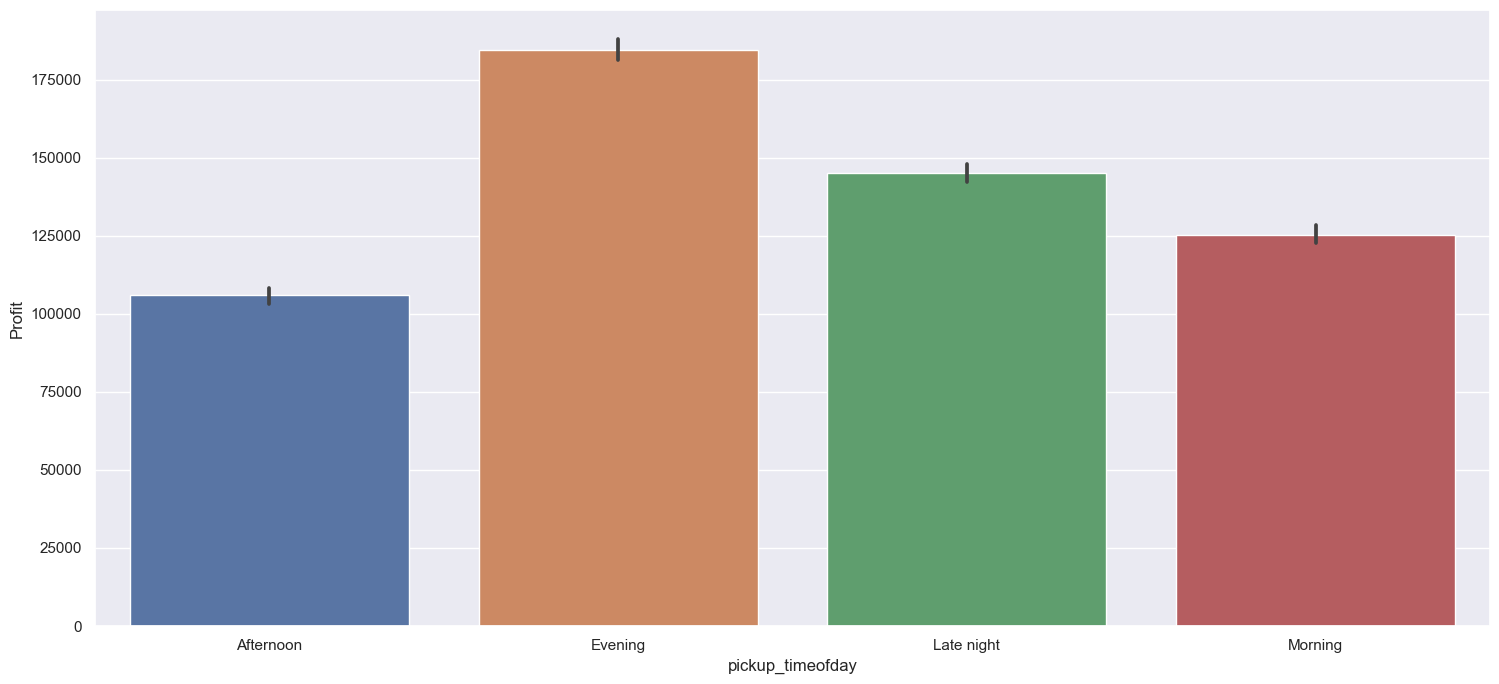

In [28]:
sns.barplot(data=df,x='pickup_timeofday',y='Profit',estimator=sum)
#We see that we get the highest profit at evening

In [29]:
#Q2: Which hours corresponds for highest profit
df.groupby('pickup_hour')[['Profit']].sum().reset_index().sort_values(by='Profit',ascending=False)

,pickup_hour,Profit
21,21,33875.068431
20,20,32965.501833
22,22,32680.294724
18,18,32537.992856
19,19,31408.494537
23,23,29226.043706
15,15,28903.562729
17,17,28267.057302
14,14,27421.313937
16,16,25532.019982


<Axes: xlabel='pickup_hour', ylabel='Profit'>

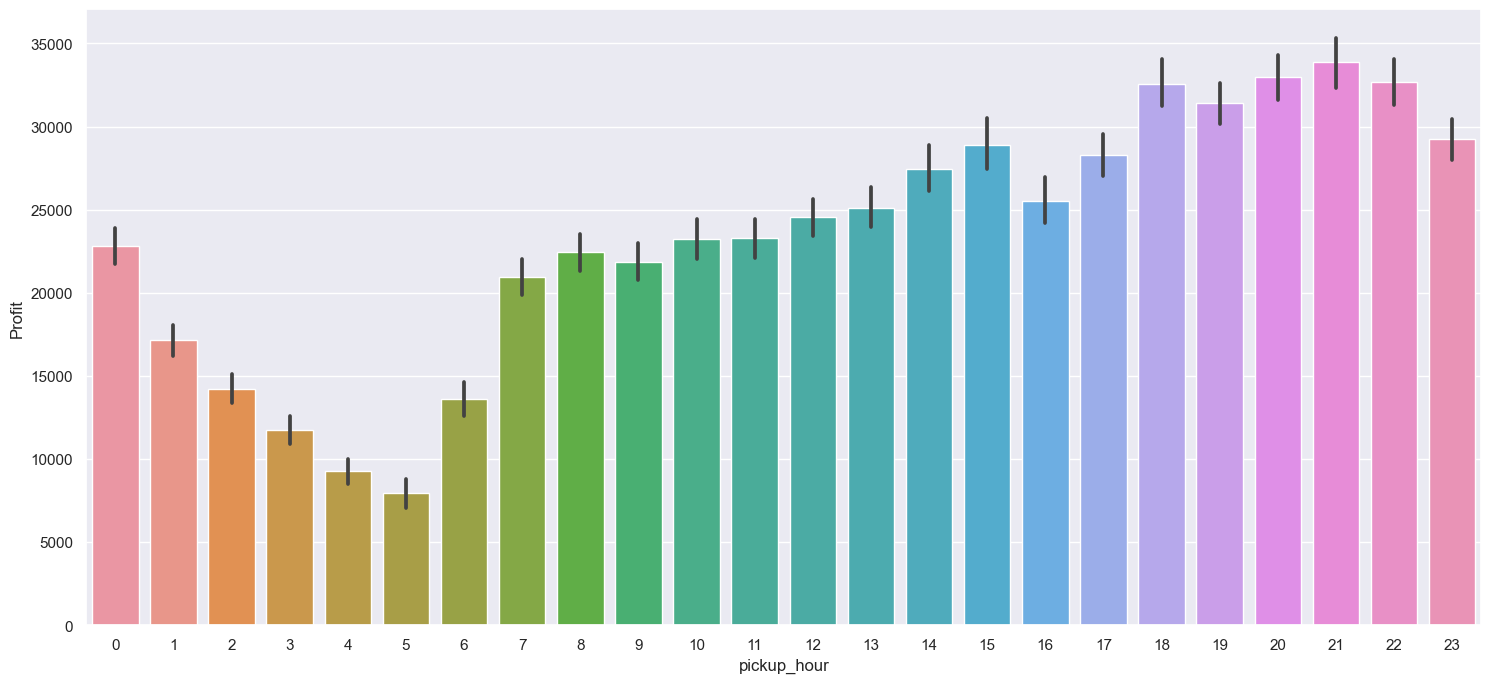

In [30]:
sns.barplot(data=df,x='pickup_hour',y='Profit',estimator=sum)
#We get the highest profit at (9 PM)

In [31]:
#Q3 : Vendor ratio
df.groupby('vendor_id').size()

vendor_id
1    18604
2    21625
dtype: int64

<Axes: xlabel='vendor_id', ylabel='count'>

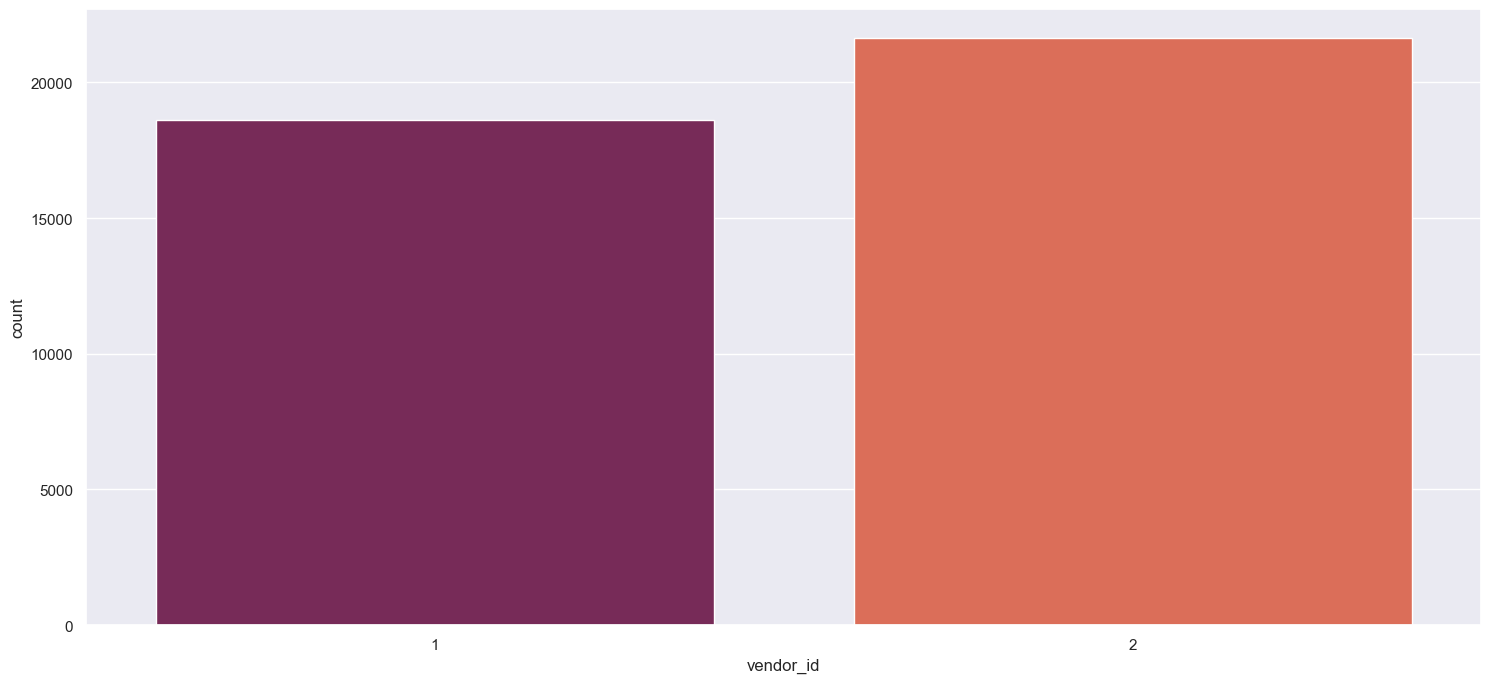

In [32]:
sns.countplot(data=df,x='vendor_id',palette='rocket')
#Vendor with ID (2) make's more rides

In [33]:
#Q4 : Outliers in trip duration
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day_name,pickup_hour,pickup_timeofday,distance,Profit
0,2,2016-01-11 12:05:45,2016-01-11 12:12:34,1,-73.989449,40.741734,-73.996880,40.725307,Monday,12,Afternoon,1.930838,8.324456
1,1,2016-01-14 12:04:38,2016-01-14 12:21:14,1,-73.993034,40.747849,-73.979271,40.749985,Thursday,12,Afternoon,1.183499,5.036161
2,1,2016-01-09 20:03:09,2016-01-09 20:10:45,1,-74.005157,40.720306,-73.994019,40.736187,Saturday,20,Evening,1.999803,8.627900
3,1,2016-01-17 00:29:19,2016-01-17 00:31:09,2,-73.985374,40.753082,-73.979370,40.760429,Sunday,0,Late night,0.960832,4.056429
4,2,2016-01-24 23:53:10,2016-01-25 00:13:46,1,-74.014000,40.712551,-73.972519,40.797508,Sunday,23,Late night,10.072253,44.146681


In [34]:
#First we determine the trip duration for each trip in minutes
df['trip_duration'] =((df['dropoff_datetime'] - df['pickup_datetime'])/np.timedelta64(1,'m')).astype(int)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day_name,pickup_hour,pickup_timeofday,distance,Profit,trip_duration
0,2,2016-01-11 12:05:45,2016-01-11 12:12:34,1,-73.989449,40.741734,-73.996880,40.725307,Monday,12,Afternoon,1.930838,8.324456,6
1,1,2016-01-14 12:04:38,2016-01-14 12:21:14,1,-73.993034,40.747849,-73.979271,40.749985,Thursday,12,Afternoon,1.183499,5.036161,16
2,1,2016-01-09 20:03:09,2016-01-09 20:10:45,1,-74.005157,40.720306,-73.994019,40.736187,Saturday,20,Evening,1.999803,8.627900,7
3,1,2016-01-17 00:29:19,2016-01-17 00:31:09,2,-73.985374,40.753082,-73.979370,40.760429,Sunday,0,Late night,0.960832,4.056429,1
4,2,2016-01-24 23:53:10,2016-01-25 00:13:46,1,-74.014000,40.712551,-73.972519,40.797508,Sunday,23,Late night,10.072253,44.146681,20


<Axes: xlabel='trip_duration'>

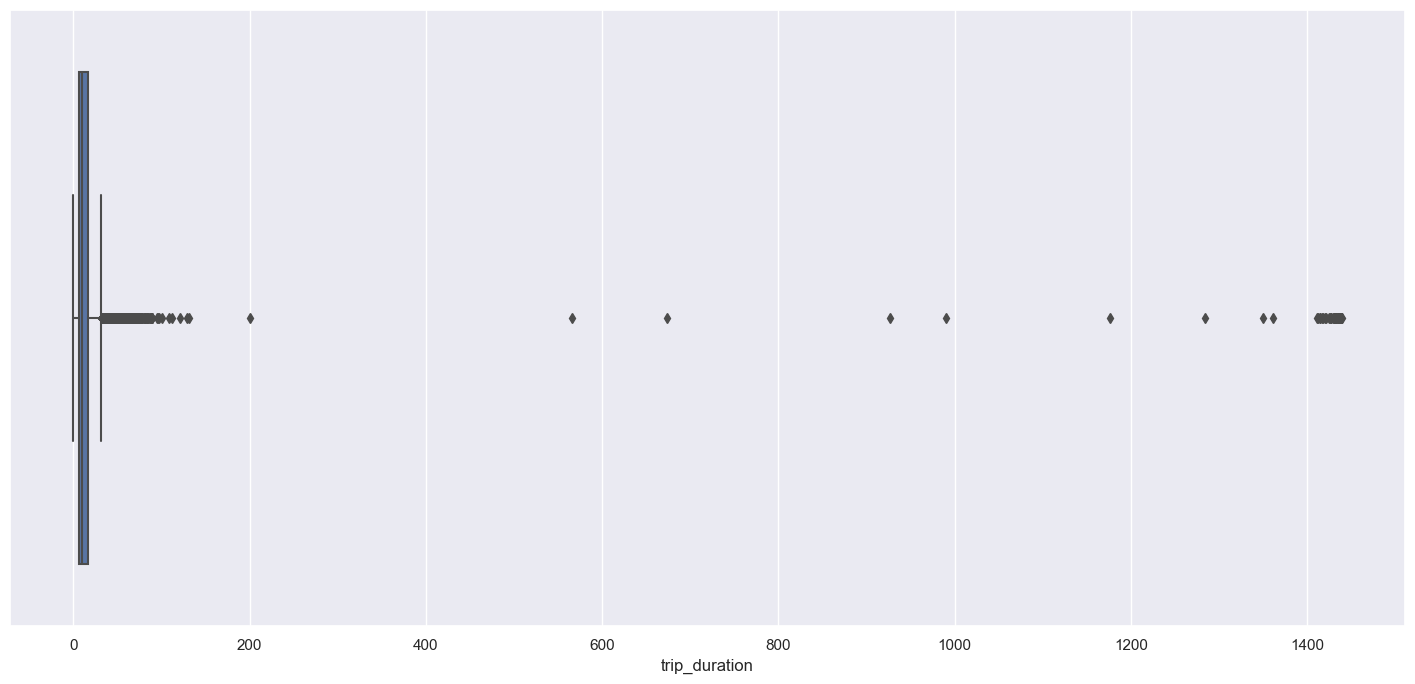

In [35]:
sns.boxplot(data=df,x='trip_duration')
#We Found a huge number of outliers

In [36]:
q1= df['trip_duration'].quantile(0.25)
q3= df['trip_duration'].quantile(0.75)
IQR = q3-q1
lower_lim = q1 - (1.5*IQR)
upper_lim = q3 + (1.5*IQR)
df_td_no_outliers = df.query(' @lower_lim <= trip_duration <= @upper_lim ')
df_td_no_outliers

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day_name,pickup_hour,pickup_timeofday,distance,Profit,trip_duration
0,2,2016-01-11 12:05:45,2016-01-11 12:12:34,1,-73.989449,40.741734,-73.996880,40.725307,Monday,12,Afternoon,1.930838,8.324456,6
1,1,2016-01-14 12:04:38,2016-01-14 12:21:14,1,-73.993034,40.747849,-73.979271,40.749985,Thursday,12,Afternoon,1.183499,5.036161,16
2,1,2016-01-09 20:03:09,2016-01-09 20:10:45,1,-74.005157,40.720306,-73.994019,40.736187,Saturday,20,Evening,1.999803,8.627900,7
3,1,2016-01-17 00:29:19,2016-01-17 00:31:09,2,-73.985374,40.753082,-73.979370,40.760429,Sunday,0,Late night,0.960832,4.056429,1
4,2,2016-01-24 23:53:10,2016-01-25 00:13:46,1,-74.014000,40.712551,-73.972519,40.797508,Sunday,23,Late night,10.072253,44.146681,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56270,2,2016-01-05 21:17:46,2016-01-05 21:23:54,1,-73.940521,40.789101,-73.927551,40.811356,Tuesday,21,Evening,2.704760,11.729709,6
56271,1,2016-01-18 00:07:51,2016-01-18 00:24:33,2,-73.964668,40.806786,-73.990891,40.751305,Monday,0,Late night,6.552412,28.659379,16
56272,2,2016-01-02 10:44:45,2016-01-02 10:52:42,5,-73.990791,40.767532,-73.994202,40.751591,Saturday,10,Morning,1.795751,7.730071,7
56274,1,2016-01-30 19:30:35,2016-01-30 19:52:41,1,-73.994484,40.740356,-73.962189,40.767681,Saturday,19,Evening,4.078204,17.772865,22


In [37]:
print(lower_lim,upper_lim)
df_td_no_outliers.query(' @lower_lim > trip_duration | trip_duration > @upper_lim ')

-9.0 31.0


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day_name,pickup_hour,pickup_timeofday,distance,Profit,trip_duration


<Axes: xlabel='trip_duration'>

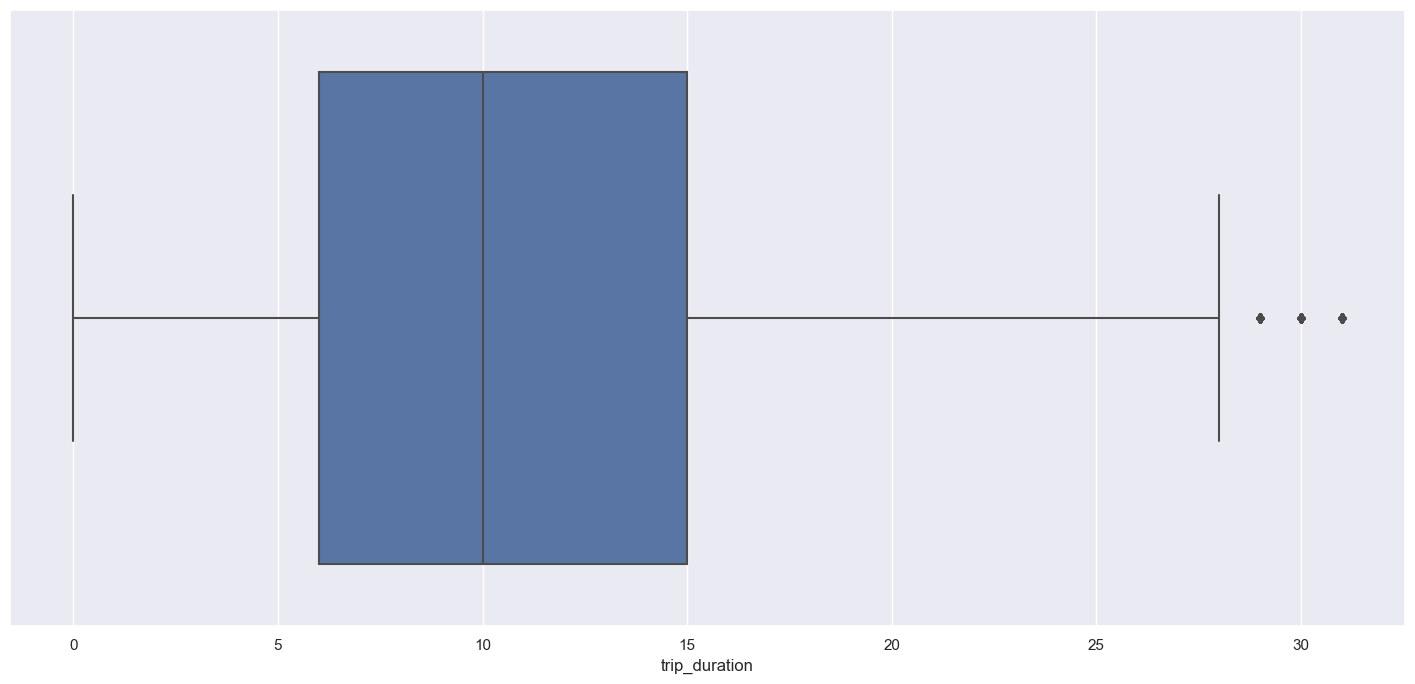

In [38]:
sns.boxplot(data=df_td_no_outliers,x='trip_duration')
#We get rid of outliers

In [39]:
#Q5 : Find the average profit for each timezone for each day
df_avg_prof = df.pivot_table(index='pickup_timeofday',columns='pickup_day_name',
                             values='Profit',aggfunc=np.mean)
df_avg_prof

pickup_day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
pickup_timeofday,,,,,,,
Afternoon,13.502797,13.595193,11.644655,13.706298,13.259186,12.201109,12.680595
Evening,13.515177,13.070921,12.155331,14.511326,13.385399,14.456827,13.431973
Late night,17.031819,18.566555,15.304485,16.775366,17.369968,17.503200,16.416891
Morning,13.251635,13.846907,13.715599,13.991751,11.991751,12.209682,12.137220


<Axes: xlabel='pickup_day_name', ylabel='pickup_timeofday'>

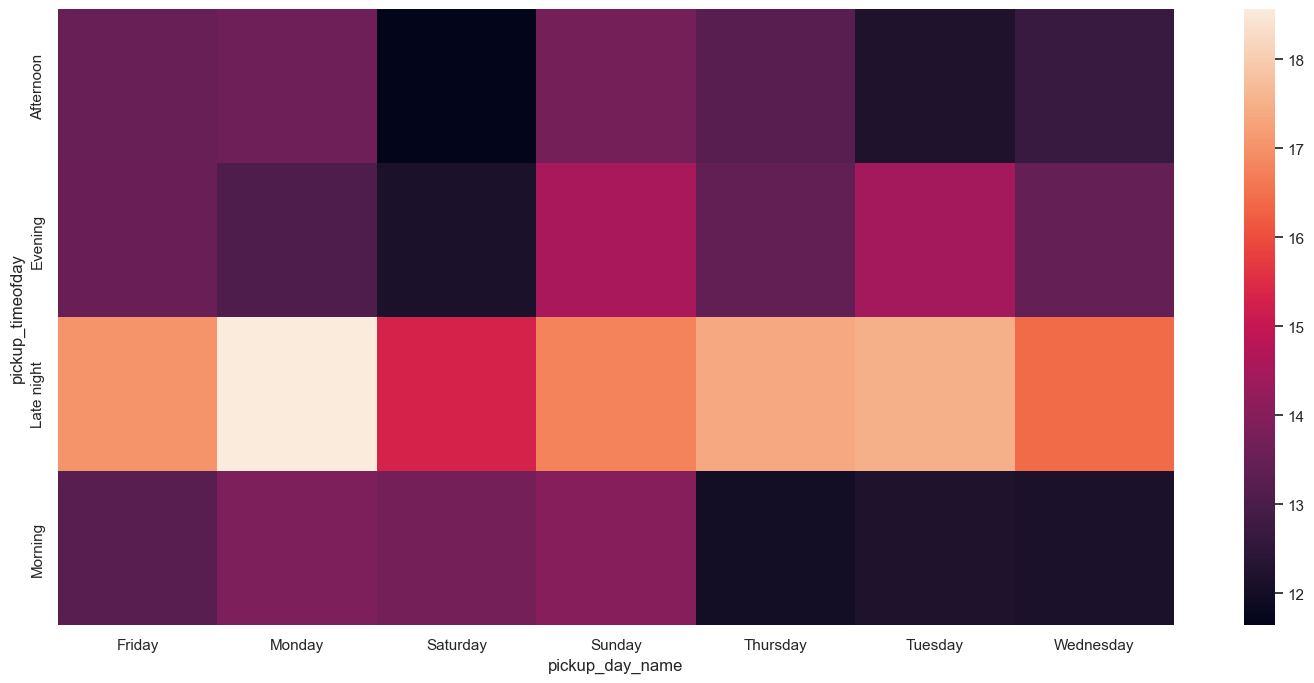

In [40]:
sns.heatmap(df_avg_prof)
#We found that in monday at late night we get the highest average profit

<Axes: xlabel='pickup_day_name', ylabel='Profit'>

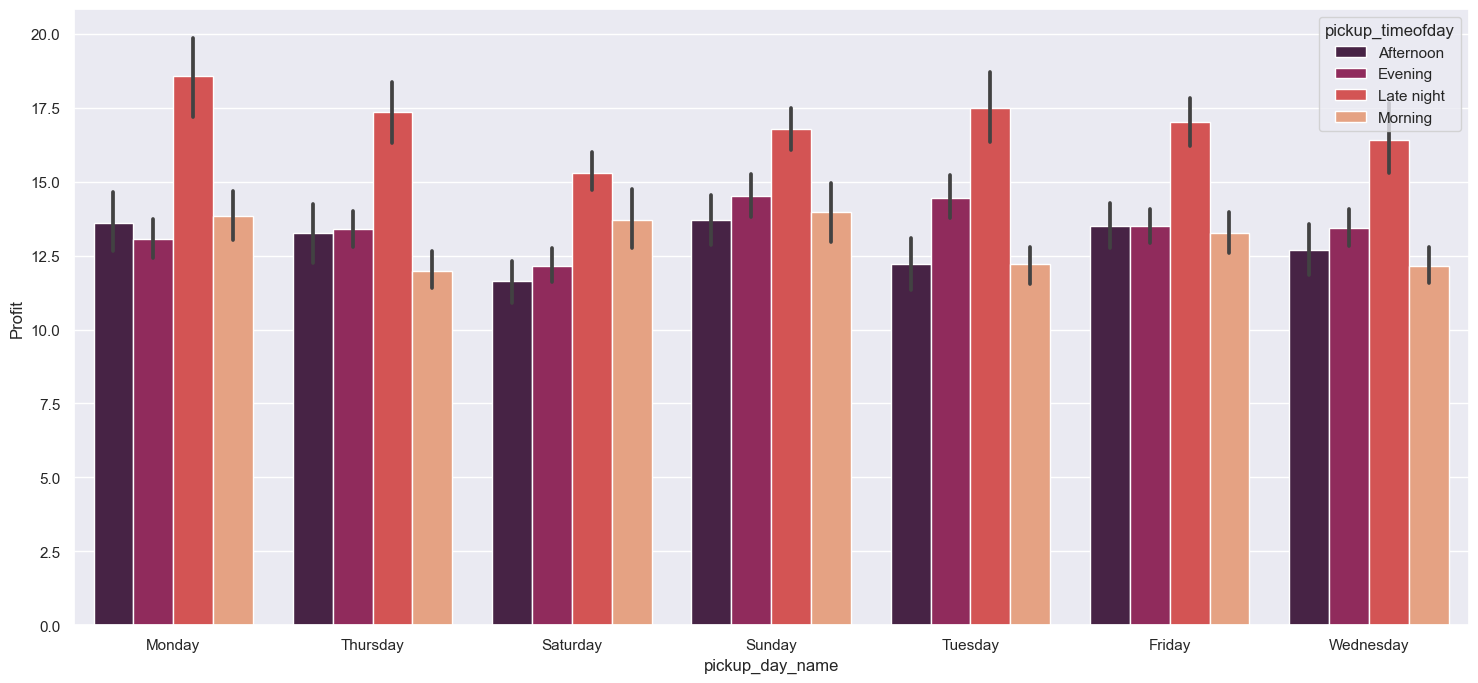

In [41]:
sns.barplot(data=df,x='pickup_day_name',y='Profit',hue='pickup_timeofday',estimator=np.mean,palette='rocket')

# Conclusions
.(6 PM) is the most pickup hour<br>
.(Friday) is the most pickup day<br>
.There is a strong relation between distance and profit<br>
.No matter the number of passengers in the taxi,The profit always depends on the distance<br>
.At (9 PM) we get the highest profits<br>
.Vendor with ID (2) makes more rides than ID (1)<br>
.On monday late nights we get the hishest profits in average